In [25]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc3)


In [0]:
import pandas as pd
import tensorflow as tf
import time
import numpy as np
import tensorflow_datasets as tfds
import pathlib

In [0]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [28]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
import re
def clean_phrase(phrase):
  phrase = phrase.encode("utf-8").decode("utf-8")
  phrase = re.sub(r'https\S+','',phrase)
  phrase = re.sub(r'http\S+','',phrase)

  return phrase

In [0]:
train_data['text'] = train_data['text'].apply(lambda x : clean_phrase(x))
test_data['text'] = test_data['text'].apply(lambda x : clean_phrase(x))

In [0]:
sent_data = train_data.text.values
labels_data = train_data.target.values
sent_submission = test_data.text.values

In [0]:
from sklearn.model_selection import train_test_split
sent_train, sent_test, labels_train, labels_test = train_test_split(sent_data, labels_data, test_size=0.2, random_state=42)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sent_data)

X_train = tokenizer.texts_to_sequences(sent_data)
# X_test = tokenizer.texts_to_sequences(sent_test)
X_submission = tokenizer.texts_to_sequences(sent_submission)

y_train = labels_data
# y_test = labels_test

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sent_train[2])
print(X_train[2])

Tell @BarackObama to rescind medals of 'honor' given to US soldiers at the Massacre of Wounded Knee. SIGN NOW &amp; RT! 
[36, 1748, 1618, 4, 6880, 3, 6881, 20, 132, 6882, 17, 1749, 35, 437, 252, 53, 2155, 3, 711, 1403, 20, 1104]


In [35]:

maxlen = 280

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_submission = pad_sequences(X_submission, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 115 4609   20    1  866    5   18  259  134 1617 4610   85   36    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [0]:
from tensorflow.keras import Sequential, layers, regularizers

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [38]:
embedding_dim = 100
drop_out_prob = 0.3

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dropout(drop_out_prob))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(drop_out_prob))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 280, 100)          1809900   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

Epoch 1/50
61/61 [==============================] - 2s 33ms/step - loss: 0.6773 - accuracy: 0.5775 - val_loss: 0.6845 - val_accuracy: 0.5345
Epoch 2/50
61/61 [==============================] - 2s 29ms/step - loss: 0.6140 - accuracy: 0.6080 - val_loss: 0.6251 - val_accuracy: 0.6881
Epoch 3/50
61/61 [==============================] - 2s 28ms/step - loss: 0.4871 - accuracy: 0.8204 - val_loss: 0.5253 - val_accuracy: 0.7866
Epoch 4/50
61/61 [==============================] - 2s 28ms/step - loss: 0.3204 - accuracy: 0.8987 - val_loss: 0.4710 - val_accuracy: 0.7886
Epoch 5/50
61/61 [==============================] - 2s 28ms/step - loss: 0.2081 - accuracy: 0.9450 - val_loss: 0.4829 - val_accuracy: 0.7886
Epoch 6/50
61/61 [==============================] - 2s 28ms/step - loss: 0.1421 - accuracy: 0.9624 - val_loss: 0.5234 - val_accuracy: 0.7564
Epoch 7/50
61/61 [==============================] - 2s 28ms/step - loss: 0.1129 - accuracy: 0.9708 - val_loss: 0.5602 - val_accuracy: 0.7511
Epoch 8/50
61

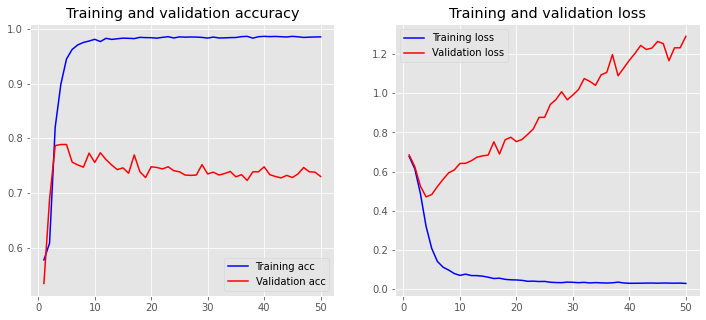

In [39]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=100)
plot_history(history)

In [0]:

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
%%time
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/4'
embed = hub.KerasLayer(module_url, trainable=False, name='USE_embedding')

CPU times: user 16.3 s, sys: 2.79 s, total: 19.1 s
Wall time: 18.6 s


In [0]:
   # Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)


In [0]:
def build_model(embed):
    model = Sequential([
        layers.Input(shape=[], dtype=tf.string),
        embed,
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

 

    model.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [44]:
model = build_model(embed)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE_embedding (KerasLayer)   {'outputs': (None, 512)}  147354880 
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [45]:

checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    sent_data, labels_data,
    validation_split=0.2,
    epochs=20,
    callbacks=[checkpoint],
    batch_size=32
)


Epoch 1/20
191/191 [==============================] - 26s 136ms/step - loss: 0.5847 - accuracy: 0.7461 - val_loss: 0.6197 - val_accuracy: 0.5680
Epoch 2/20
191/191 [==============================] - 17s 89ms/step - loss: 0.4481 - accuracy: 0.8072 - val_loss: 0.4645 - val_accuracy: 0.8083
Epoch 3/20
191/191 [==============================] - 17s 91ms/step - loss: 0.4151 - accuracy: 0.8209 - val_loss: 0.3868 - val_accuracy: 0.8365
Epoch 4/20
191/191 [==============================] - 17s 91ms/step - loss: 0.3762 - accuracy: 0.8360 - val_loss: 0.3816 - val_accuracy: 0.8359
Epoch 5/20
191/191 [==============================] - 13s 69ms/step - loss: 0.3482 - accuracy: 0.8499 - val_loss: 0.3935 - val_accuracy: 0.8385
Epoch 6/20
191/191 [==============================] - 13s 70ms/step - loss: 0.3378 - accuracy: 0.8525 - val_loss: 0.4069 - val_accuracy: 0.8378
Epoch 7/20
191/191 [==============================] - 13s 70ms/step - loss: 0.3162 - accuracy: 0.8719 - val_loss: 0.4162 - val_accuracy

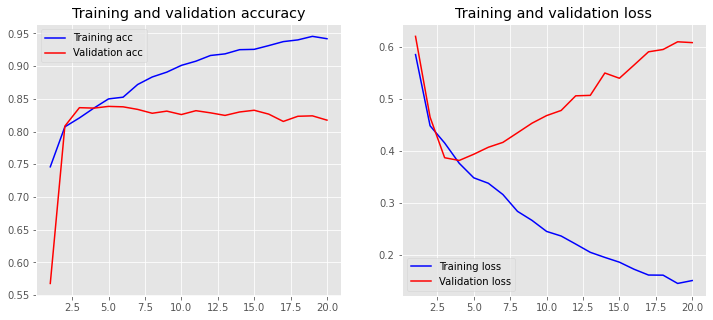

In [46]:

plot_history(history)